## Project Brief

### A company is currently struggling with the problem of very low lead conversion rates. Organization wishes to identify the most potential leads - ‘Hot Leads’ for the for the sales team to focus on leads which are more likely to convert.

#### My goal here is to:
- Build a model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- Try to maintain the conversion rate to 80% or above
- Develop a stable and robust model which could handle future requirement changes


### importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### importing "Leads.csv" dataset

In [2]:
lead_score_df= pd.read_csv(r"Leads.csv")
lead_score_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data analysis 

In [3]:
lead_score_df.shape

(9240, 37)

In [4]:
df = pd.DataFrame(lead_score_df.info())
df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

""


In [5]:
lead_score_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Calculating the total null value of the columns

In [6]:
df = pd.DataFrame(lead_score_df.isnull().sum())
df

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


### Plotting the pairplot

<Figure size 2880x2880 with 0 Axes>

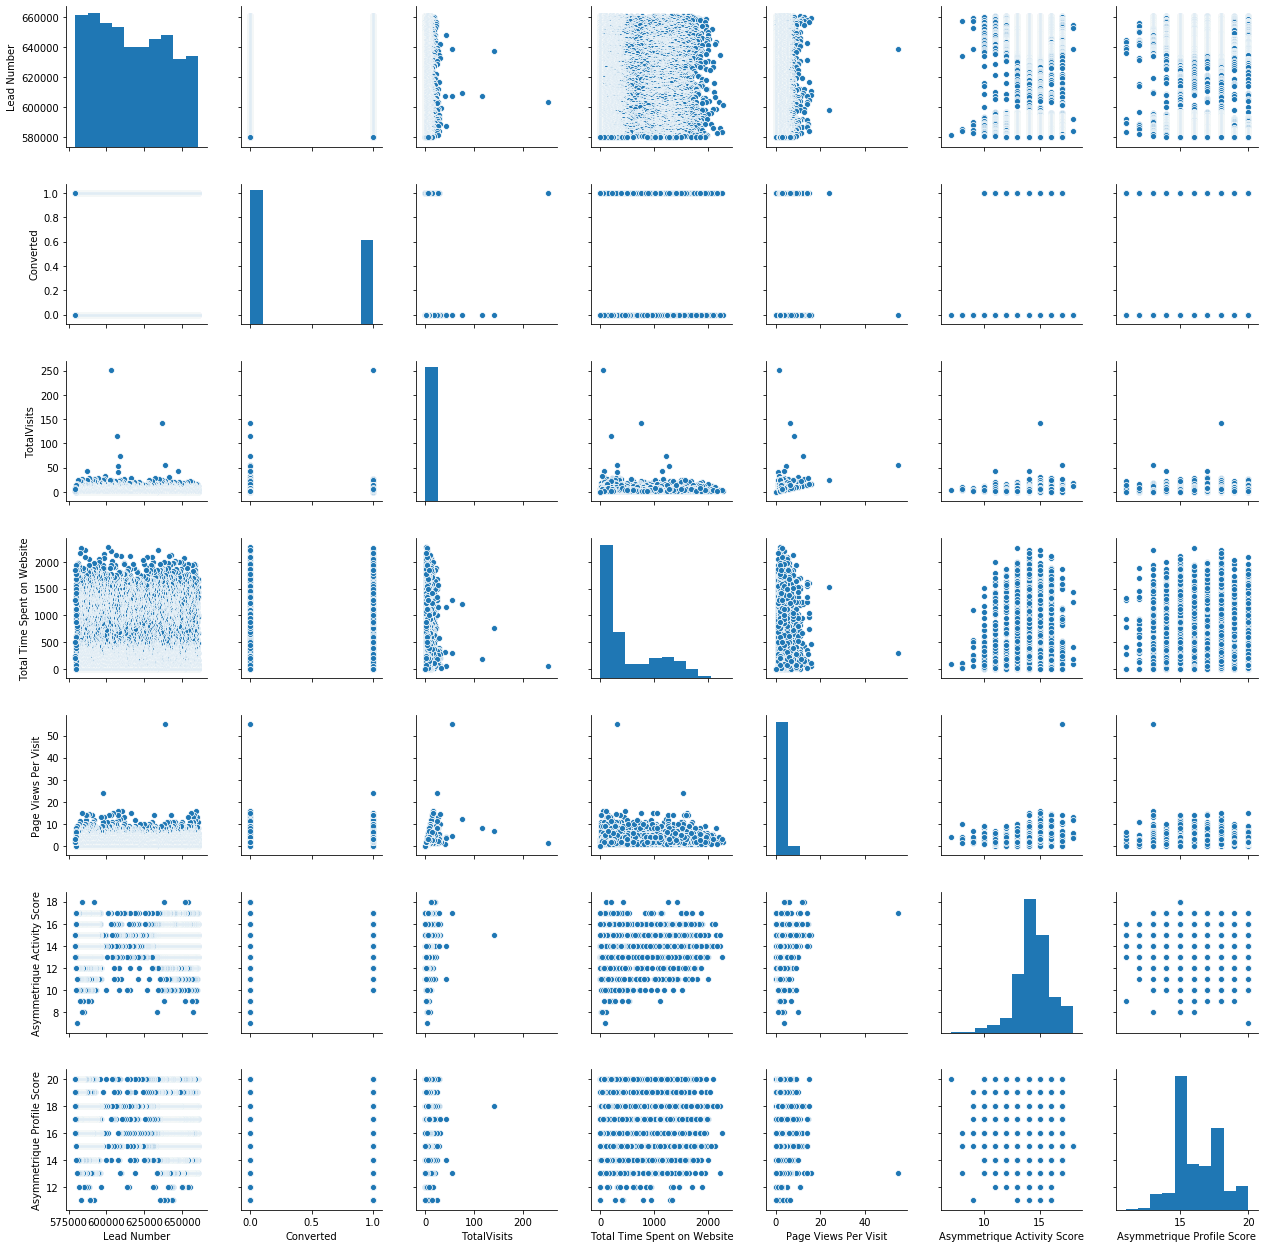

In [7]:
fig = plt.figure(figsize = (40,40))
sns.pairplot(lead_score_df,markers="o")

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

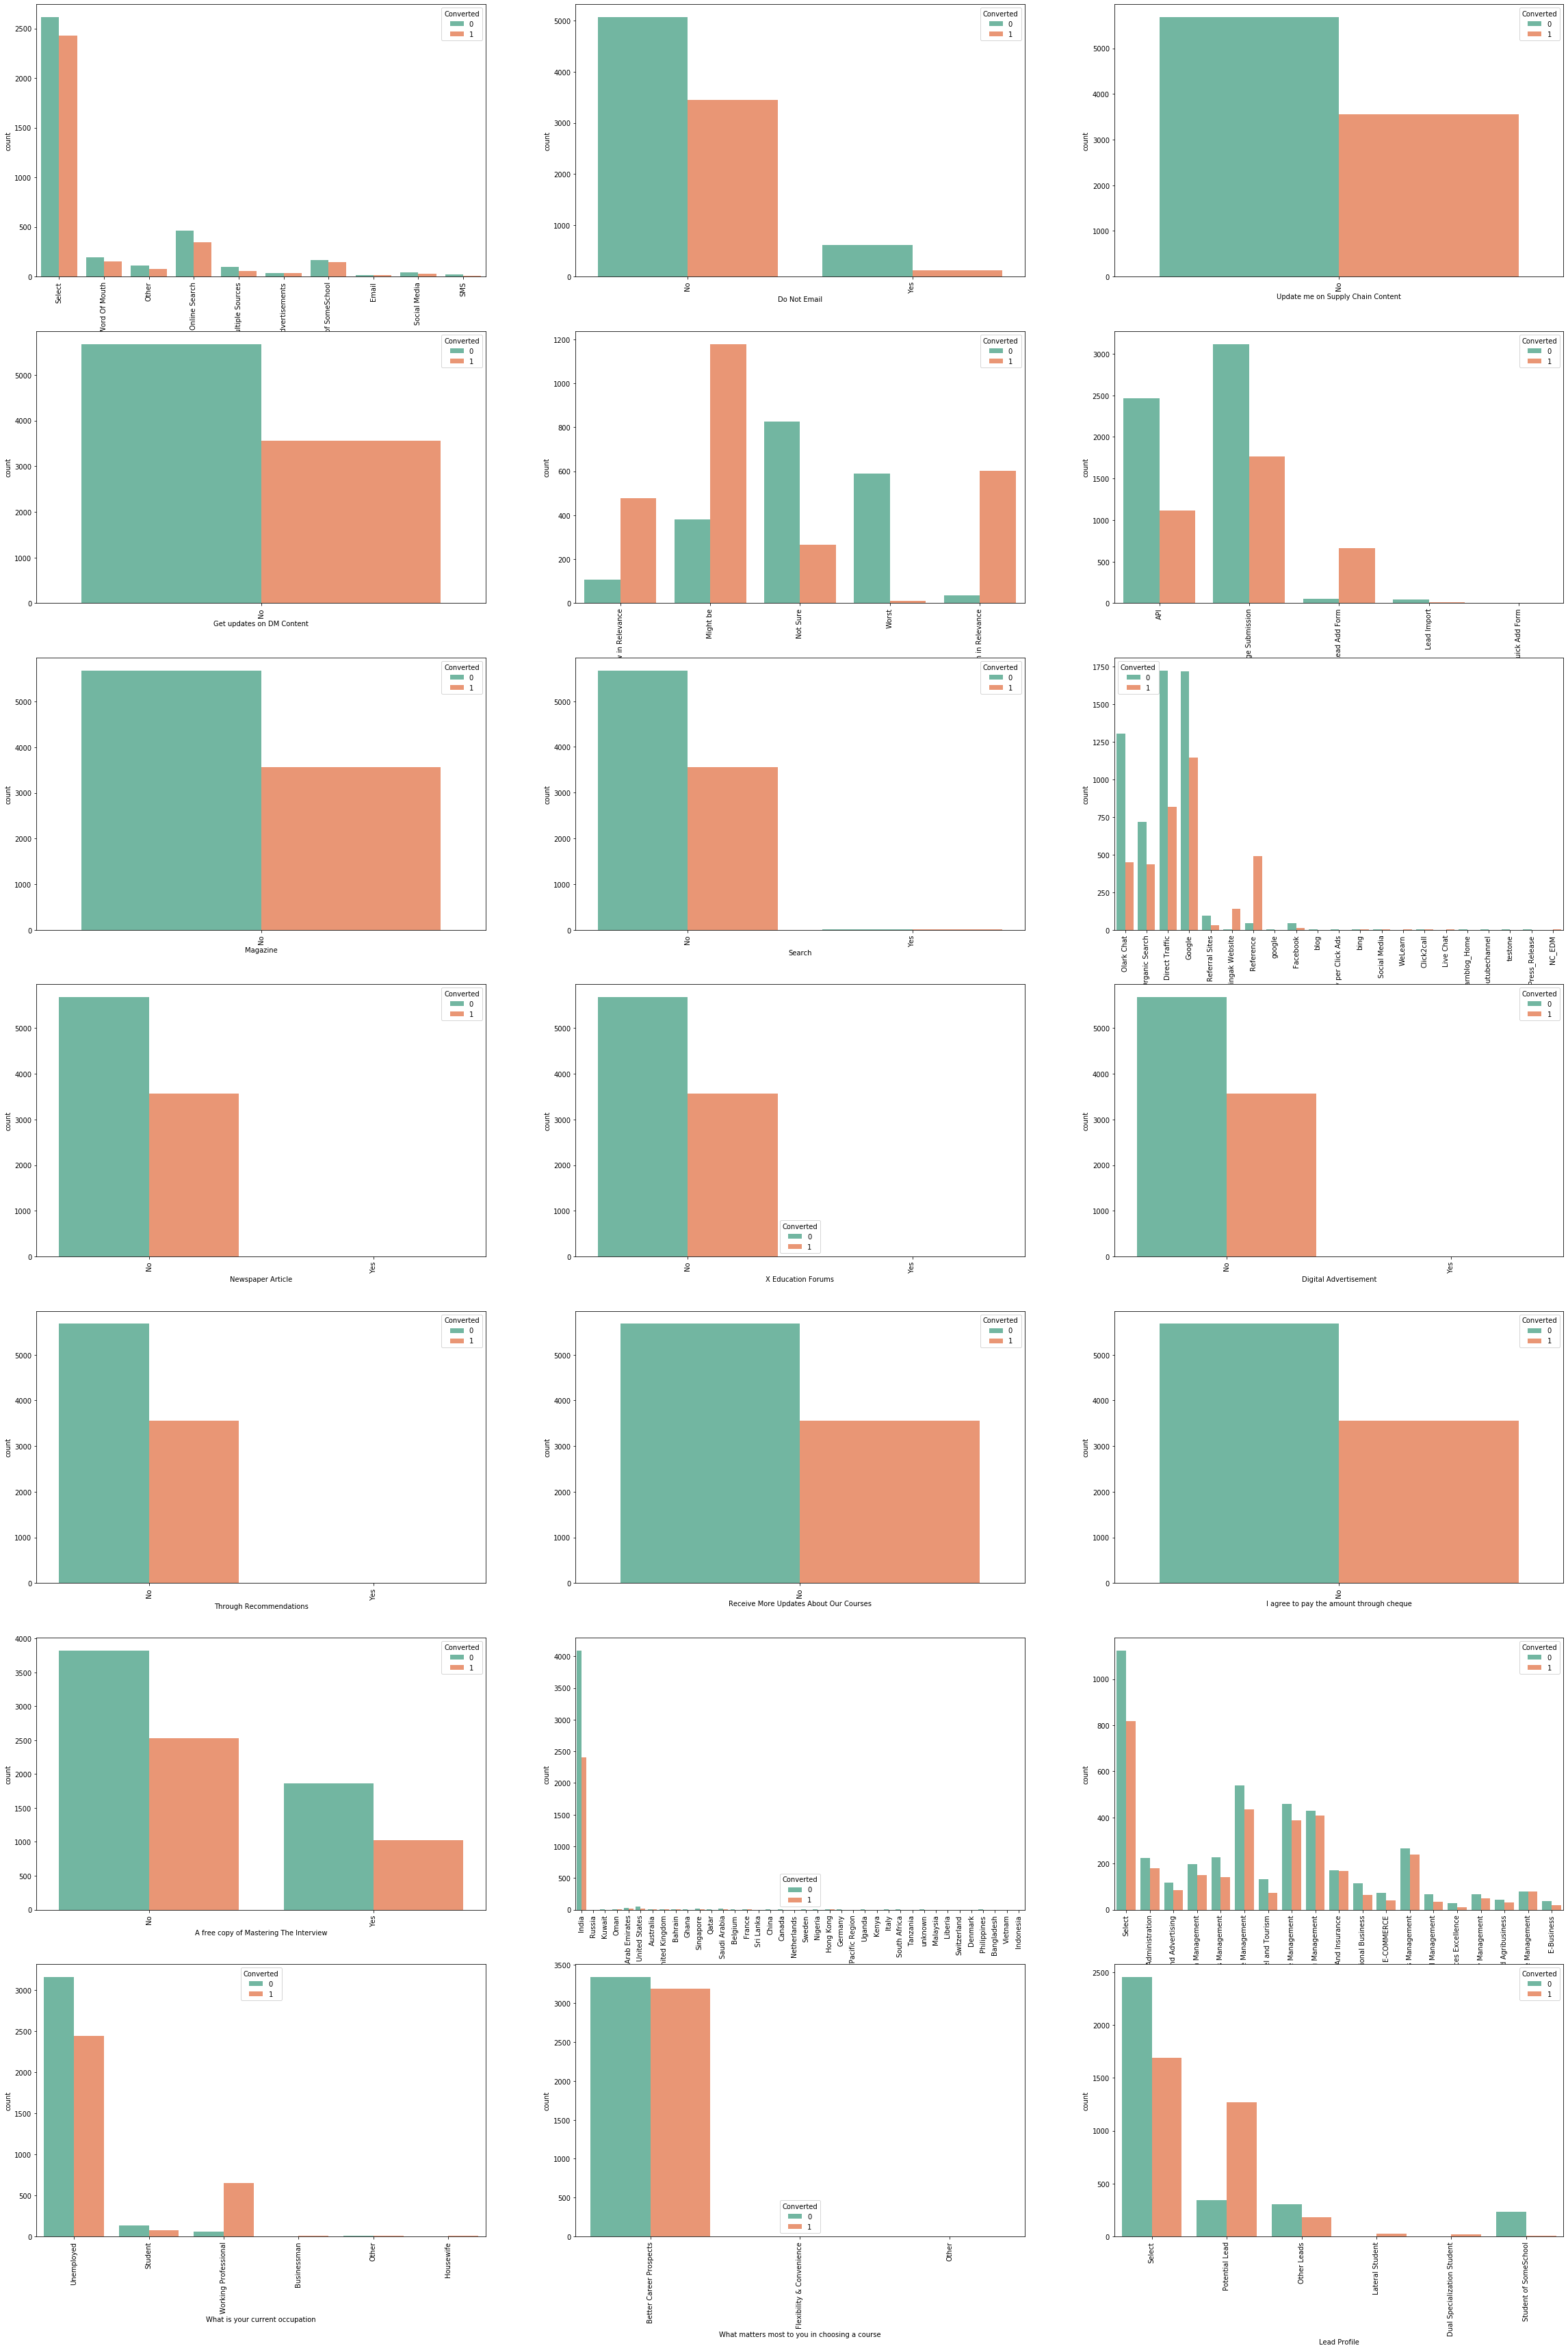

In [8]:
plt.figure(figsize = (40,60))

plt.subplot(7,3,1)
sns.countplot(x='How did you hear about X Education',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,2)
sns.countplot(x='Do Not Email',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,3)
sns.countplot(x='Update me on Supply Chain Content',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,4)
sns.countplot(x='Get updates on DM Content',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)


plt.subplot(7,3,5)
sns.countplot(x='Lead Quality',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,6)
sns.countplot(x='Lead Origin',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,7)
sns.countplot(x='Magazine',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,8)
sns.countplot(x='Search',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,9)
sns.countplot(x='Lead Source',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,10)
sns.countplot(x='Newspaper Article',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,11)
sns.countplot(x='X Education Forums',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,12)
sns.countplot(x='Digital Advertisement',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)


plt.subplot(7,3,13)
sns.countplot(x='Through Recommendations',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,14)
sns.countplot(x='Receive More Updates About Our Courses',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,15)
sns.countplot(x='I agree to pay the amount through cheque',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,16)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,17)
sns.countplot(x='Country',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,18)
sns.countplot(x='Specialization',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,19)
sns.countplot(x='What is your current occupation',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,20)
sns.countplot(x='What matters most to you in choosing a course',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)

plt.subplot(7,3,21)
sns.countplot(x='Lead Profile',hue='Converted', data=lead_score_df,palette="Set2")
plt.xticks(rotation = 90)



In [9]:
# Finding percentage null value present in the  dataset
df = pd.DataFrame(round(100*(lead_score_df.isnull().sum()/len(lead_score_df.index)), 2))
df

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


### Check the spread of values for different columns and remove ones with most of the observation having same values  

In [10]:
list1=['Do Not Email','Do Not Call','How did you hear about X Education','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',  
'I agree to pay the amount through cheque','Country','City','Last Notable Activity','Specialization','Lead Profile','What matters most to you in choosing a course']
for X in list1:
    A=lead_score_df[X].value_counts()
    print("------------"*9)
    print ("      ")
    print("`"+X +"`"+" column contains following values :")
    print(A)

------------------------------------------------------------------------------------------------------------
      
`Do Not Email` column contains following values :
No     8506
Yes     734
Name: Do Not Email, dtype: int64
------------------------------------------------------------------------------------------------------------
      
`Do Not Call` column contains following values :
No     9238
Yes       2
Name: Do Not Call, dtype: int64
------------------------------------------------------------------------------------------------------------
      
`How did you hear about X Education` column contains following values :
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64
-------------

### Dropping the irrelevant columns:
#####       Prospect ID -
it is just a record identifier
##### Do Not Email -
Prospects opted out of email could not be contacted.So this variable should not be considered in model
#####  Do Not Call - 
Prospects opted out of call could not be contacted. So this variable should not be considered fro model
#####       Magazine - 
All the values are 'No'
#####       Newspaper Article - 
Most of the values are 'No'. Just two observations with Yes
#####       X Education Forums - 
Most of the values are 'No'. Just one observation with Yes
#####       Newspaper - 
Most of the values are 'No'. Just one observation with Yes
#####       Digital Advertisement -  
Most of the values are 'No'. Just four observations with Yes
#####       Receive More Updates About Our Courses - 
All the values are 'No'
#####       Update me on Supply Chain Content - 
All the values are 'No'
#####       Get updates on DM Content - 
All the values are 'No'
#####       I agree to pay the amount through cheque - 
All the values are 'No'
#####       What matters most to you in choosing a course - 
Most of the values are either missing or 'Better Career Prospects'
#####       Lead Profile -
Most of the values are either missing or 'Select' which is also kind of missing
#####       City -
Majority of values are either missing or 'Select' which is also kind of missing.Rest are skewed towards Mumbai
#####       Last Notable Activity - 
It is redundant field. Updated version of last activity


In [11]:
lead_score_df.drop(['Prospect ID',
                 'Do Not Email',
                 'Do Not Call',
                 'How did you hear about X Education',
                 'Search','Magazine','Newspaper Article',
                 'X Education Forums',
                 'Newspaper','Digital Advertisement'
                 ,'Through Recommendations',
                 'Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content',  
                 'I agree to pay the amount through cheque','Country'
                 ,'City','Last Notable Activity'
                 ,'Specialization','Lead Profile',
                 'What matters most to you in choosing a course'],axis=1,inplace=True)
#lead_score_df.head()

In [12]:
#Checking the null values of the columns left
df = pd.DataFrame(lead_score_df.isnull().sum())
df

,0
Lead Number,0
Lead Origin,0
Lead Source,36
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137
Last Activity,103
What is your current occupation,2690
Tags,3353


In [13]:
# percentage of null value 
df = pd.DataFrame(round(100*(lead_score_df.isnull().sum()/len(lead_score_df.index)), 2))
df

,0
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
What is your current occupation,29.11
Tags,36.29


### Columns having less missing values which we will using for analysis: 

In [14]:
list1=['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview']
for X in list1:
    A=lead_score_df[X].value_counts()
    print("------------"*9)
    print ("      ")
    print("`"+X +"`"+" column contains following values :")
    print(A)

------------------------------------------------------------------------------------------------------------
      
`Lead Number` column contains following values :
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
------------------------------------------------------------------------------------------------------------
      
`Lead Origin` column contains following values :
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------------------------------------------------------------------------------------------------------
      
`Lead Source` column contains following values :
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welin

### plotting pairplot to analyse the pattern of number of "converted" in various columns:

<Figure size 2880x2880 with 0 Axes>

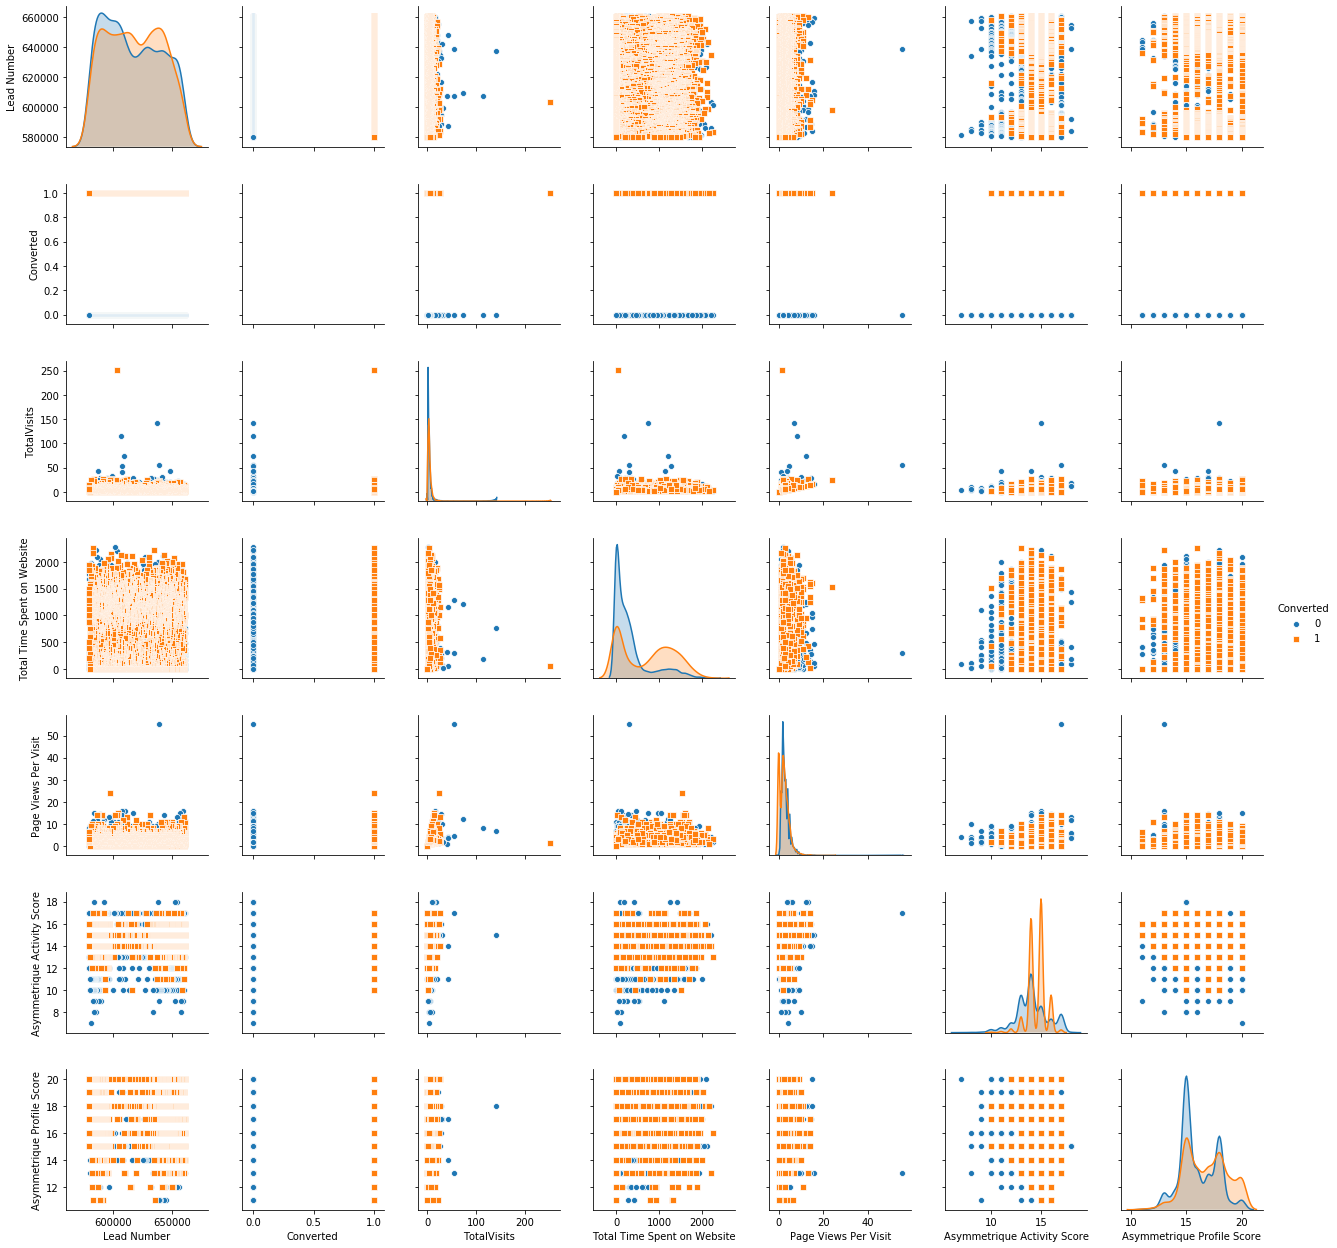

In [15]:
fig = plt.figure(figsize = (40,40))
sns.pairplot(lead_score_df,hue='Converted', markers=["o", "s"])

### Outlier analysis of the data:

[]

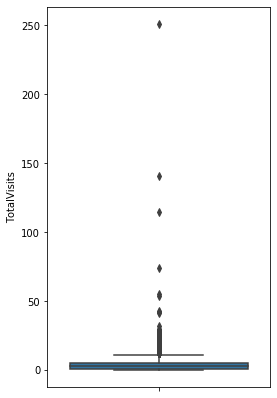

In [16]:
# box plot of "total visits " with outliers
fig = plt.figure(figsize = (4,7))
sns.boxplot(lead_score_df.TotalVisits,orient="v")
plt.plot()

[]

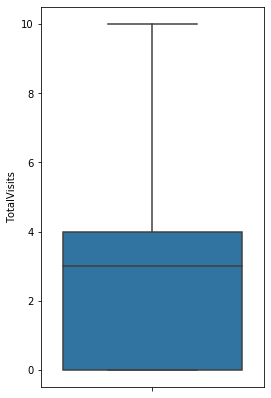

In [17]:
# box plot of "total visits " without outliers
Q1 = lead_score_df.TotalVisits.quantile(0.05)
Q3 = lead_score_df.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
lead_score_df = lead_score_df[(lead_score_df.TotalVisits >= Q1) & (lead_score_df.TotalVisits <= Q3)]
fig = plt.figure(figsize = (4,7))
sns.boxplot(lead_score_df.TotalVisits,orient="v")
plt.plot()

[]

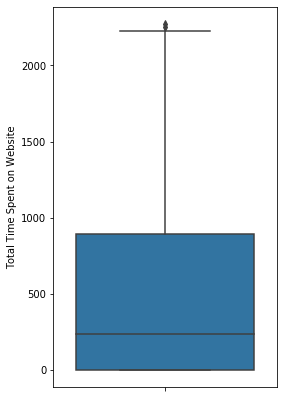

In [18]:
# box plot of "'Total Time Spent on Website'" with outliers
fig = plt.figure(figsize = (4,7))
sns.boxplot(lead_score_df['Total Time Spent on Website'],orient="v")
plt.plot()

[]

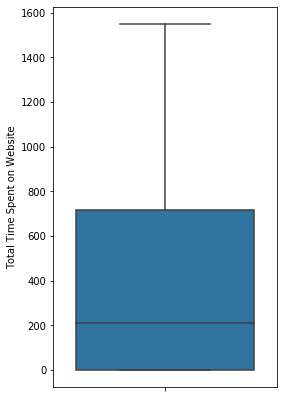

In [19]:
## box plot of "'Total Time Spent on Website'" without outliers

Q1 = lead_score_df['Total Time Spent on Website'].quantile(0.05)
Q3 = lead_score_df['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
lead_score_df = lead_score_df[(lead_score_df['Total Time Spent on Website'] >= Q1) & (lead_score_df['Total Time Spent on Website'] <= Q3)]
fig = plt.figure(figsize = (4,7))
sns.boxplot(lead_score_df['Total Time Spent on Website'],orient="v")
plt.plot()

In [20]:
# analyzing the null values of  columns
lead_score_df.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
What is your current occupation           2534
Tags                                      3130
Lead Quality                              4428
Asymmetrique Activity Index               3837
Asymmetrique Profile Index                3837
Asymmetrique Activity Score               3837
Asymmetrique Profile Score                3837
A free copy of Mastering The Interview       0
dtype: int64

#### We are including the columns which are relevant for the business :

In [21]:
# dropping certaincolumns having many missing values
lead_score_df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)
lead_score_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,Interested in other courses,Low in Relevance,No
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,Ringing,NaN,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Will revert after reading the email,Might be,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,Ringing,Not Sure,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,Will revert after reading the email,Might be,No


### Imputing the missing values accordingly:

In [22]:
#Imputing with mode as thiscolumn follows a normaldistributin:
lead_score_df['Lead Source'].fillna(lead_score_df['Lead Source'].mode()[0], inplace = True)
lead_score_df['Lead Source'].value_counts()

Google               2613
Direct Traffic       2269
Olark Chat           1732
Organic Search        976
Reference             434
Welingak Website      128
Referral Sites        104
Facebook               31
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
welearnblog_Home        1
WeLearn                 1
testone                 1
Pay per Click Ads       1
youtubechannel          1
blog                    1
Press_Release           1
NC_EDM                  1
Name: Lead Source, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

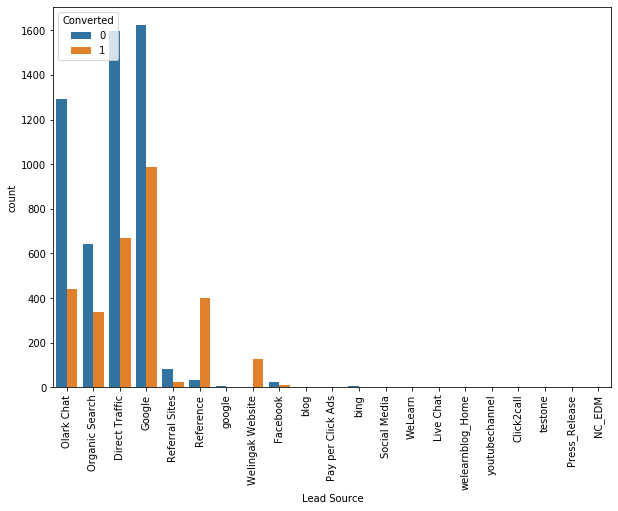

In [23]:
# analysing how many converted in case of lead source
fig = plt.figure(figsize = (10,7))
sns.countplot(x='Lead Source',hue='Converted', data=lead_score_df)
plt.xticks(rotation = 90)

In [24]:
#Imputing with mode as thiscolumn follows a normaldistributin
lead_score_df['What is your current occupation'].fillna(lead_score_df['What is your current occupation'].mode()[0], inplace = True)
lead_score_df['What is your current occupation'].value_counts()

Unemployed              7490
Working Professional     601
Student                  198
Other                     12
Housewife                  8
Businessman                4
Name: What is your current occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

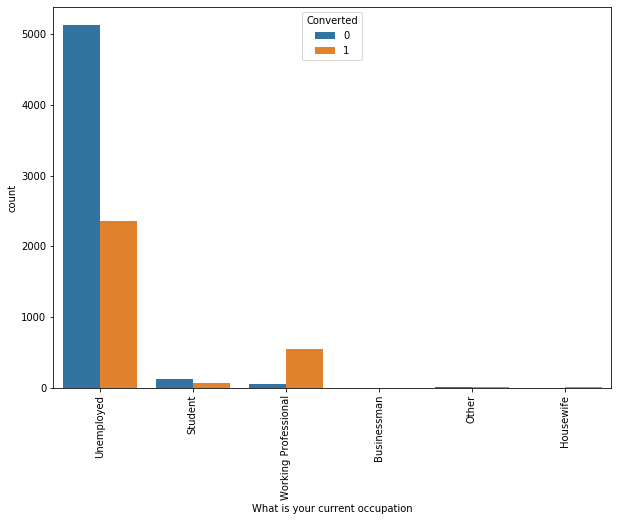

In [25]:
# analysing how many converted in " what is your occupation" column
fig = plt.figure(figsize = (10,7))
sns.countplot(x='What is your current occupation',hue='Converted', data=lead_score_df)
plt.xticks(rotation = 90)

In [26]:
#Imputing with mode as thiscolumn follows a normaldistributin

lead_score_df['Tags'].fillna(lead_score_df['Tags'].mode()[0], inplace = True)
lead_score_df['Tags'].value_counts()

Will revert after reading the email                  4903
Ringing                                              1092
Interested in other courses                           472
Already a student                                     442
Closed by Horizzon                                    251
switched off                                          225
Busy                                                  162
Lost to EINS                                          145
Not doing further education                           131
Interested  in full time MBA                          109
Graduation in progress                                102
invalid number                                         79
Diploma holder (Not Eligible)                          59
wrong number given                                     43
opp hangup                                             32
number not provided                                    24
in touch with EINS                                     11
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

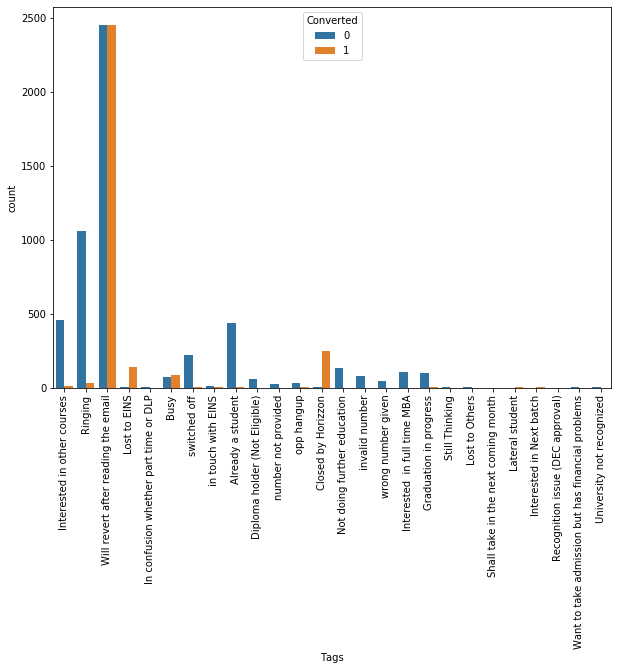

In [27]:
# analysing that how nay coverted in tags column
fig = plt.figure(figsize = (10,7))
sns.countplot(x='Tags',hue='Converted', data=lead_score_df)
plt.xticks(rotation = 90)

In [28]:
#Imputing with mode as thiscolumn follows a normaldistributin

lead_score_df['Lead Quality'].fillna(lead_score_df['Lead Quality'].mode()[0], inplace = True)
lead_score_df['Lead Quality'].value_counts()

Might be             5783
Not Sure              967
Worst                 565
High in Relevance     510
Low in Relevance      488
Name: Lead Quality, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

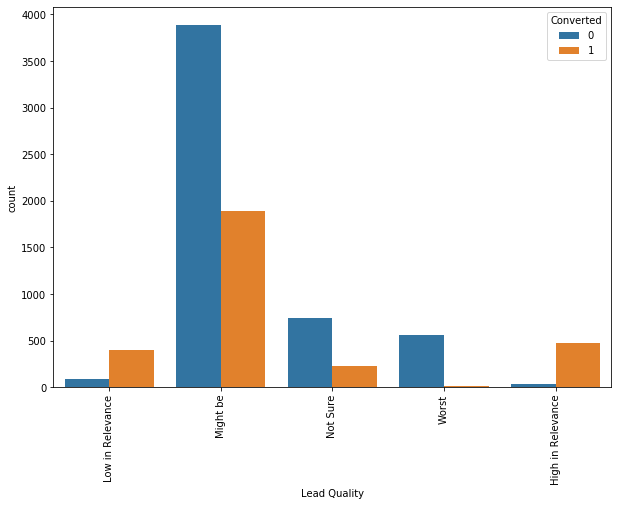

In [29]:
# analysing that how many are converted in "lead quality " column
fig = plt.figure(figsize = (10,7))
sns.countplot(x='Lead Quality',hue='Converted', data=lead_score_df)
plt.xticks(rotation = 90)

### Now we are again checking the null values in the columns:

In [30]:
lead_score_df.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
Tags                                      0
Lead Quality                              0
A free copy of Mastering The Interview    0
dtype: int64

## Now here we are creating the dummy variables: 

In [31]:
# Creating dummyvariables for variable'Lead Origin'
lead_origin=pd.get_dummies(lead_score_df['Lead Origin'],prefix='Origin',drop_first= True)
#concatinating results and master-dataframe
lead_score_df = pd.concat([lead_score_df,lead_origin],axis=1)

# here we arecreating dummy-variables for the variable 'Lead Source'
lead_source=pd.get_dummies(lead_score_df['Lead Source'],prefix='Source',drop_first= True)
#concatinating results and master-dataframe
lead_score_df = pd.concat([lead_score_df,lead_source],axis=1)

# here we arecreating dummy-variables for the variable 'occupation'
occupation=pd.get_dummies(lead_score_df['What is your current occupation'],prefix='occupation',drop_first= True)
#concatinating results and master-dataframe
lead_score_df = pd.concat([lead_score_df,occupation],axis=1)

# here we arecreating dummy-variables for the variable 'Tags'
tags=pd.get_dummies(lead_score_df['Tags'],prefix='Tags',drop_first= True)
#concatinating results and master-dataframe
lead_score_df = pd.concat([lead_score_df,tags],axis=1)

# here we arecreating dummy-variables for the variable 'Lead Quality'
lead_quality=pd.get_dummies(lead_score_df['Lead Quality'],prefix='Quality',drop_first= True)
#concatinating results and master-dataframe
lead_score_df = pd.concat([lead_score_df,lead_quality],axis=1)

# here we arecreating dummy-variables for the variable 'Last Notable Activity'
notable_activity=pd.get_dummies(lead_score_df['Last Activity'],prefix='notable_activity',drop_first= True)
#concatinating results and master-dataframe
lead_score_df = pd.concat([lead_score_df,notable_activity],axis=1)

### Now here we are using the lable-encoder for certain variables:

In [32]:
# importing the data pre processing module from sklearn

from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
lead_score_df['A free copy of Mastering The Interview'] = le.fit_transform(lead_score_df['A free copy of Mastering The Interview'])

In [33]:
# Droping the columns for which we have created the dummy variables inorder to avoid high correlation

lead_score_df.drop(['Lead Origin','Lead Source','What is your current occupation','Tags','Lead Quality','Last Activity','A free copy of Mastering The Interview'], axis = 1, inplace = True)

In [34]:
# here we are assigning feature variable to x

X = lead_score_df.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Direct Traffic,Source_Facebook,Source_Google,Source_Live Chat,...,notable_activity_Form Submitted on Website,notable_activity_Had a Phone Conversation,notable_activity_Olark Chat Conversation,notable_activity_Page Visited on Website,notable_activity_Resubscribed to emails,notable_activity_SMS Sent,notable_activity_Unreachable,notable_activity_Unsubscribed,notable_activity_View in browser link Clicked,notable_activity_Visited Booth in Tradeshow
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# here we are assigning the response variable to y

y = lead_score_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [36]:
# splitting data to traing and testing data set:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [37]:
# importing the min max scaler from sklearndatapreprocessing;

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scalling operations to the columns except dummy variables:
num_vars = ['Total Time Spent on Website','Page Views Per Visit','TotalVisits']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [38]:
# checking the dat after scalin operations

X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Direct Traffic,Source_Facebook,Source_Google,Source_Live Chat,...,notable_activity_Form Submitted on Website,notable_activity_Had a Phone Conversation,notable_activity_Olark Chat Conversation,notable_activity_Page Visited on Website,notable_activity_Resubscribed to emails,notable_activity_SMS Sent,notable_activity_Unreachable,notable_activity_Unsubscribed,notable_activity_View in browser link Clicked,notable_activity_Visited Booth in Tradeshow
count,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,...,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000
mean,0.284843,0.262259,0.220294,0.522770,0.070459,0.003437,0.276508,0.003609,0.316377,0.000172,...,0.010998,0.001719,0.110500,0.061523,0.000172,0.303145,0.010139,0.006874,0.000344,0.000172
std,0.245784,0.304187,0.192341,0.499524,0.255941,0.058530,0.447309,0.059971,0.465102,0.013109,...,0.104304,0.041423,0.313539,0.240307,0.013109,0.459657,0.100190,0.082631,0.018538,0.013109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.300000,0.134926,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.463525,0.300000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking correlation among the variables

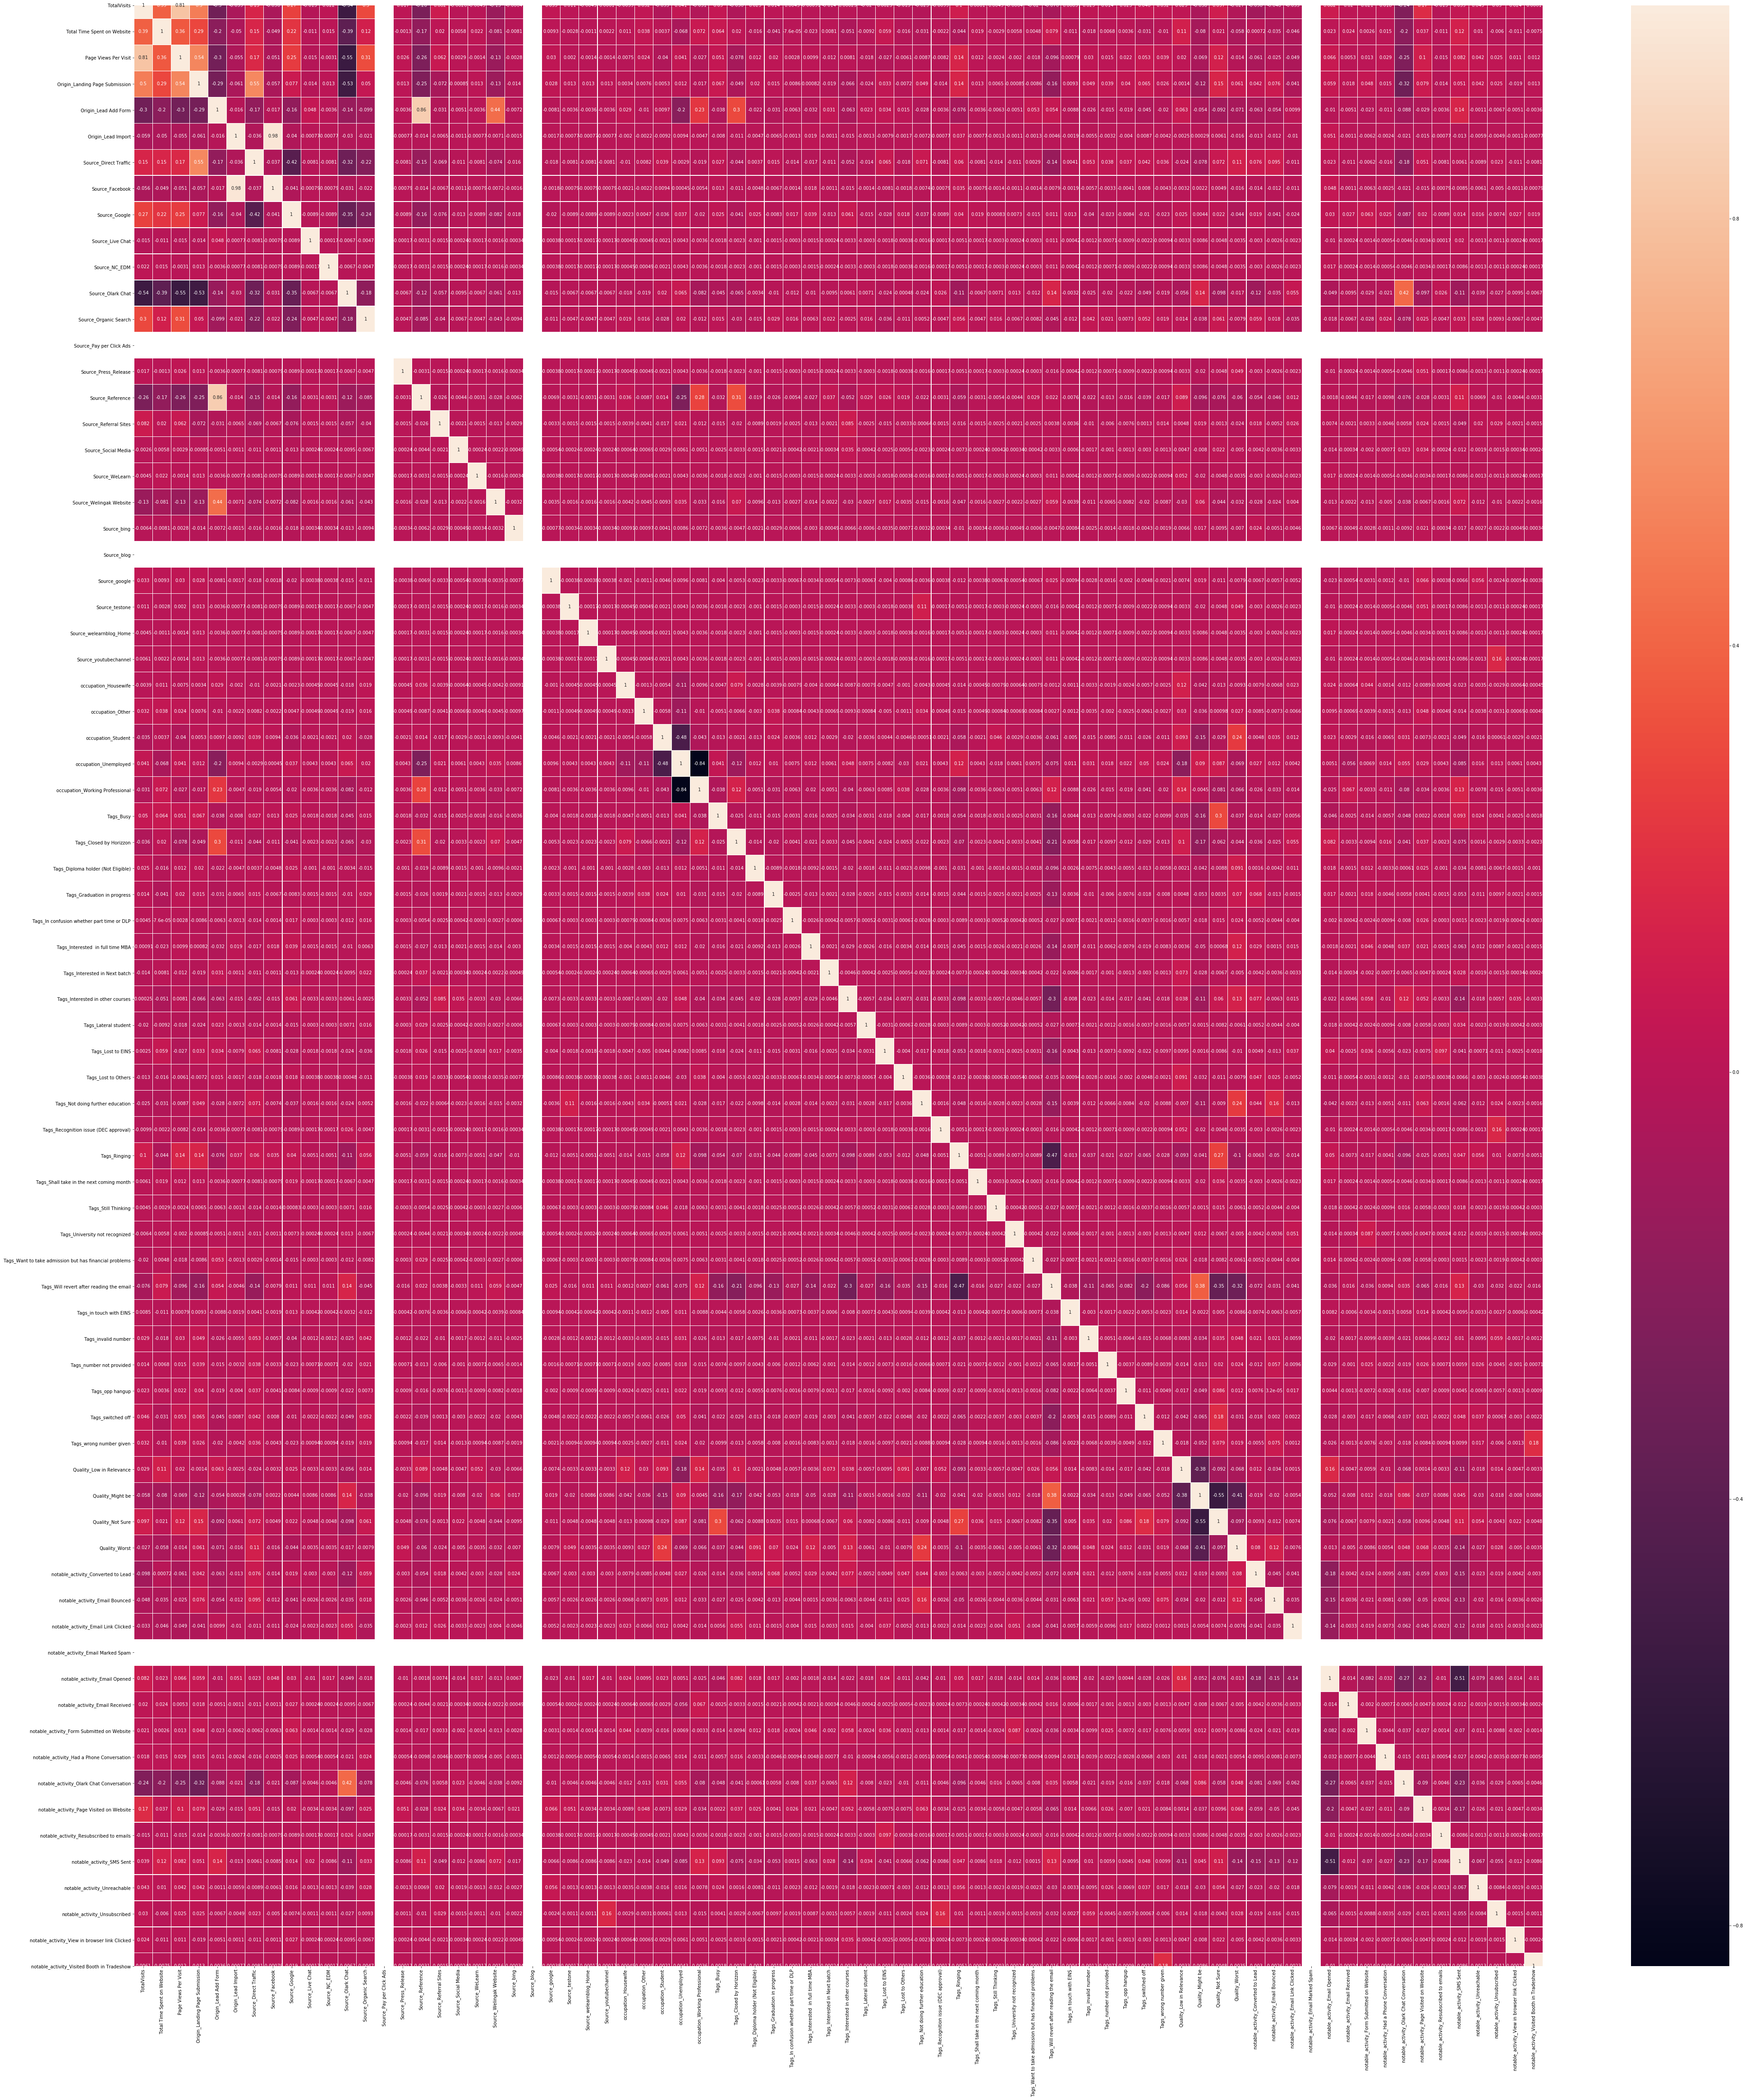

In [39]:
# plotting correlation heat map for analysing the highly correlated variables:
plt.figure(figsize = (70,80))
sns.heatmap(X_train.corr(), annot = True, linewidths = 0.1)
plt.show()

In [40]:
# Dropping highly correlated variables from the dataset:

X_test = X_test.drop(['Origin_Lead Add Form','Source_Direct Traffic','Origin_Lead Import','Origin_Landing Page Submission','Page Views Per Visit','Source_Direct Traffic'], 1)
X_train = X_train.drop(['Origin_Lead Add Form','Source_Direct Traffic','Origin_Lead Import','Origin_Landing Page Submission','Page Views Per Visit','Source_Direct Traffic'], 1)

In [41]:
# now here we are just cheking the conversion rate:

conversion = (sum(lead_score_df['Converted'])/len(lead_score_df['Converted'].index))*100
conversion

36.088054853843374

### Importing the statsmodel:

In [42]:
import statsmodels.api as sm

# here we are building the logistic regression model using the stats model:

x= sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
x.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5819
Model:                            GLM   Df Residuals:                     5750
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Apr 2020   Deviance:                          nan
Time:                        11:23:08   Pearson chi2:                 3.76e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.314e+15   5.19e+07   2.53e+07      0.000    1.31e+15    1.31e+15
TotalVisits                                             3.138e+14   5.24e+06   5.99e+07      0.000    3.14e+14    3.14e+14
Total Time Spent on Website                             1.188e+15   3.48e+06   3.42e+08      0.000    1.19e+15    1.19e+15
Source_Facebook                                         1.055e+15   1.49e+07   7.08e+07      0.000    1.06e+15    1.06e+15
Source_Google                                           1.795e+14   2.36e+06    7.6e+07      0.000     1.8e+14     1.8e+14
Source_Live Chat                                         5.77e+15   6.72e+07   8.59e+07      0.000    5.77e+15    5.77e+15
Source_NC_EDM                                           4.401e+15   6.72e+07   6.55e+07      0.000     4.4e+15     4.4e+15
Source_Olark Chat                                        7.83e+14   3.47e+06   2.26e+08      0.000    7.83e+14    7.83e+14
Source_Organic Search                                   7.795e+13   3.22e+06   2.42e+07      0.000    7.79e+13    7.79e+13
Source_Pay per Click Ads                                -122.2909      1e-06  -1.22e+08      0.000    -122.291    -122.291
Source_Press_Release                                   -3.191e+15   6.74e+07  -4.74e+07      0.000   -3.19e+15   -3.19e+15
Source_Reference                                        8.319e+14    5.2e+06    1.6e+08      0.000    8.32e+14    8.32e+14
Source_Referral Sites                                   4.078e+14   8.24e+06   4.95e+07      0.000    4.08e+14    4.08e+14
Source_Social Media                                     8.984e+14   4.76e+07   1.89e+07      0.000    8.98e+14    8.98e+14
Source_WeLearn                                          3.618e+15   6.73e+07   5.38e+07      0.000    3.62e+15    3.62e+15
Source_Welingak Website                                 1.535e+15   7.97e+06   1.93e+08      0.000    1.54e+15    1.54e+15
Source_bing                                            -3.531e+15   3.37e+07  -1.05e+08      0.000   -3.53e+15   -3.53e+15
Source_blog                                               -9.6312   3.77e-07  -2.55e+07      0.000      -9.631      -9.631
Source_google                                          -4.273e+15   3.02e+07  -1.41e+08      0.000   -4.27e+15   -4.27e+15
Source_testone                                          5.087e+14   6.76e+07   7.52e+06      0.000    5.09e+14    5.09e+14
Source_welearnblog_Home                                -4.121e+15   6.72e+07  -6.14e+07      0.000   -4.12e+15   -4.12e+15
Source_youtubechannel                                  -4.012e+15    6.8e+07   -5.9e+07      0.000   -4.01e+15   -4.01e+15
occupati

### Importing the LogisticRegression from sklearn.linear_model

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Here we are using RFE 

In [44]:
# we want 10 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [45]:
df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
df

,0,1,2
0,TotalVisits,False,48
1,Total Time Spent on Website,True,1
2,Source_Facebook,False,22
3,Source_Google,False,44
4,Source_Live Chat,False,30
...,...,...,...
66,notable_activity_SMS Sent,False,2
67,notable_activity_Unreachable,False,28
68,notable_activity_Unsubscribed,False,37
69,notable_activity_View in browser link Clicked,False,53


### Analysing the model using statsmodel:

In [46]:
col = X_train.columns[rfe.support_]
X_train_statmodel = sm.add_constant(X_train[col])
a = sm.GLM(y_train,X_train_statmodel, family = sm.families.Binomial())
res = a.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5819
Model:                            GLM   Df Residuals:                     5808
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1828.5
Date:                Mon, 20 Apr 2020   Deviance:                       3657.1
Time:                        11:23:20   Pearson chi2:                 1.26e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6689      0.169    -21.715      0.000      -4.000      -3.338
Total Time Spent on Website                  3.0358      0.139     21.893      0.000       2.764       3.308
Source_Reference                             3.2761      0.334      9.807      0.000       2.621       3.931
Source_Welingak Website                      4.8857      0.721      6.776      0.000       3.472       6.299
occupation_Working Professional              2.7414      0.233     11.751      0.000       2.284       3.199
Tags_Busy                                    3.2004      0.279     11.486      0.000       2.654       3.747
Tags_Closed by Horizzon                      8.1444      0.774     10.522      0.000       6.627       9.661
Tags_Lost to EINS                            8.3004      0.572     14.510      0.000       7.179       9.422
Tags_Will revert after reading the email     4.9557      0.213     23.230      0.000       4.538       5.374
Quality_Might be                            -2.7783      0.170    -16.347      0.000      -3.111      -2.445
Quality_Worst                               -3.2285      0.778     -4.149      0.000      -4.753      -1.704
============================================================================================================
"""

### Here we are predicting values using the train set:


In [47]:
# here we are merging the lead number column with the predicted values columns:
#reshaping the array
y_trainpredicted= res.predict(X_train_statmodel)
y_trainpredicted= y_trainpredicted.values.reshape(-1)
y_trainpredicted[:10]
y_trainpredicted_2 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_trainpredicted})
y_trainpredicted_2['Lead Number'] = y_train.index
y_trainpredicted_2.head()

,Converted,Converted_Prob,Lead Number
0,1,0.999570,4194
1,0,0.200739,456
2,1,0.882325,1170
3,0,0.024559,5755
4,1,0.989292,2042


In [48]:
#Here we are using .4 as cutoff

y_trainpredicted_2['predicted'] = y_trainpredicted_2.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
df = pd.DataFrame(y_trainpredicted_2)
df

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.999570,4194,1
1,0,0.200739,456,0
2,1,0.882325,1170,1
3,0,0.024559,5755,0
4,1,0.989292,2042,1
...,...,...,...,...
5814,0,0.038854,412,0
5815,1,0.685266,91,1
5816,1,0.655397,8941,1
5817,0,0.183706,7727,0


In [49]:
# here we are plotting the confusionmatrix matrix:

from sklearn import metrics
confusionmatrix = metrics.confusion_matrix(y_trainpredicted_2.Converted, y_trainpredicted_2.predicted )
print(confusionmatrix)

[[3421  290]
 [ 421 1687]]


In [50]:
# here we are checking the accuracy:

print(metrics.accuracy_score(y_trainpredicted_2.Converted, y_trainpredicted_2.predicted))

0.8778140573981784


### Analyzing the VIF values of variables:

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# checking the vif of the features:

,Features,VIF
7,Tags_Will revert after reading the email,3.02
8,Quality_Might be,2.67
0,Total Time Spent on Website,1.67
1,Source_Reference,1.31
5,Tags_Closed by Horizzon,1.22
3,occupation_Working Professional,1.20
6,Tags_Lost to EINS,1.06
2,Source_Welingak Website,1.04
4,Tags_Busy,1.03
9,Quality_Worst,1.03


In [52]:
# true positive 
TP = confusionmatrix[1,1] 
# true negatives
TN = confusionmatrix[0,0]
# false positives
FP = confusionmatrix[0,1] 
# false negatives
FN = confusionmatrix[1,0]

In [53]:
# here we are plotting the confusionmatrix matrix:
confusionmatrix = metrics.confusion_matrix(y_trainpredicted_2.Converted, y_trainpredicted_2.predicted )
print(confusionmatrix)

[[3421  290]
 [ 421 1687]]


In [54]:
# sensitivity of model
print(TP / float(TP+FN))

0.8002846299810247


In [55]:
# specificity of model
print(TN / float(TN+FP))

0.9218539477229857


In [56]:
# false postive rate of model
print(FP/ float(TN+FP))

0.07814605227701428


In [57]:
# positive predictive value of model
print (TP / float(TP+FP))

0.8533131006575619


In [58]:
# Negative predictive value of model
print (TN / float(TN+ FN))

0.8904216553878188


### plotting the ROC curve:

In [59]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False_Positive_Rate or [1 - True-Negative_Rate]')
    plt.ylabel('True_Positive_Rate')
    plt.title('Receiver_operating_characteristic_example')
    plt.legend(loc="lower right")
    plt.show()
    return None

<Figure size 720x720 with 0 Axes>

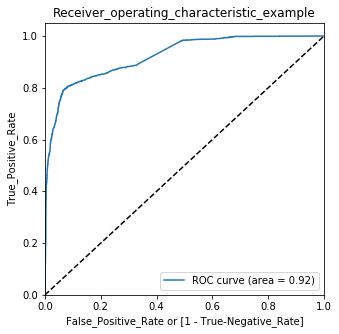

In [60]:
# plotting ROC curve:
plt.figure(figsize = (10,10))
fpr, tpr, thresholds = metrics.roc_curve( y_trainpredicted_2.Converted, y_trainpredicted_2.Converted_Prob, drop_intermediate = False )
draw_roc(y_trainpredicted_2.Converted, y_trainpredicted_2.Converted_Prob)

### Creating columns having different probability cutoffs

In [61]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_trainpredicted_2[i]= y_trainpredicted_2.Converted_Prob.map(lambda x: 1 if x > i else 0)
df = pd.DataFrame(y_trainpredicted_2)
df

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.999570,4194,1,1,1,1,1,1,1,1,1,1,1
1,0,0.200739,456,0,1,1,1,0,0,0,0,0,0,0
2,1,0.882325,1170,1,1,1,1,1,1,1,1,1,1,0
3,0,0.024559,5755,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989292,2042,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,0,0.038854,412,0,1,0,0,0,0,0,0,0,0,0
5815,1,0.685266,91,1,1,1,1,1,1,1,1,0,0,0
5816,1,0.655397,8941,1,1,1,1,1,1,1,1,0,0,0
5817,0,0.183706,7727,0,1,1,0,0,0,0,0,0,0,0


### Here we are calculating accuracy sensitivity and specificity of various probability cutoffs.

In [63]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    
    cm1 = metrics.confusion_matrix(y_trainpredicted_2.Converted, y_trainpredicted_2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
df = pd.DataFrame(cutoff_df)
df

,prob,accuracy,sensi,speci
0.0,0.0,0.362262,1.000000,0.000000
0.1,0.1,0.677264,0.983871,0.503099
0.2,0.2,0.764564,0.882353,0.697656
0.3,0.3,0.850318,0.829222,0.862301
0.4,0.4,0.877814,0.800285,0.921854
0.5,0.5,0.880392,0.775142,0.940178
0.6,0.6,0.869737,0.726755,0.950957
0.7,0.7,0.854270,0.662239,0.963352
0.8,0.8,0.822994,0.535104,0.986527
0.9,0.9,0.791029,0.433586,0.994072


### Plotting accuracy sensitivity and specificity for different probabilities.

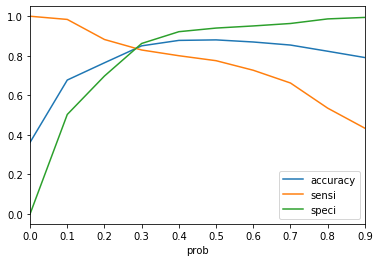

In [64]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [65]:
y_trainpredicted_2['final_predicted'] = y_trainpredicted_2.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
df = pd.DataFrame(y_trainpredicted_2)
df

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.999570,4194,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.200739,456,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.882325,1170,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.024559,5755,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989292,2042,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,0,0.038854,412,0,1,0,0,0,0,0,0,0,0,0,0
5815,1,0.685266,91,1,1,1,1,1,1,1,1,0,0,0,1
5816,1,0.655397,8941,1,1,1,1,1,1,1,1,0,0,0,1
5817,0,0.183706,7727,0,1,1,0,0,0,0,0,0,0,0,0


In [66]:
# accuracy. for cutoff o.3
print(metrics.accuracy_score(y_trainpredicted_2.Converted, y_trainpredicted_2.final_predicted))

0.8503179240419316


In [67]:
# confusionmatrix matrix for cutoff o.3
confusionmatrix2 = metrics.confusion_matrix(y_trainpredicted_2.Converted, y_trainpredicted_2.final_predicted )
print(confusionmatrix2)

[[3200  511]
 [ 360 1748]]


In [68]:
# Precision value for cutoff o.3
print(confusionmatrix[1,1]/(confusionmatrix[0,1]+confusionmatrix[1,1]))

0.8533131006575619


In [69]:
# Recall value  for cutoff o.3
print(confusionmatrix[1,1]/(confusionmatrix[1,0]+confusionmatrix[1,1]))

0.8002846299810247


### Here we are plotting precision recall curve

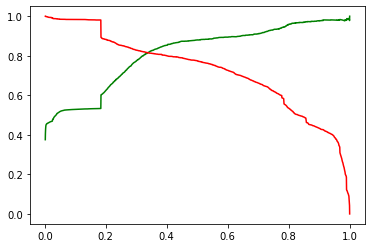

In [70]:
from sklearn.metrics import precision_recall_curve
y_trainpredicted_2.Converted, y_trainpredicted_2.predicted
p, r, thresholds = precision_recall_curve(y_trainpredicted_2.Converted, y_trainpredicted_2.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Applying minmax scaling operation on test dataset:

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Total Time Spent on Website']
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
X_test = X_test[col]
df = pd.DataFrame(X_test)
df

,Total Time Spent on Website,Source_Reference,Source_Welingak Website,occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Quality_Might be,Quality_Worst
2913,0.000000,1,0,0,0,1,0,0,0,0
3943,0.000000,0,0,0,0,0,0,0,1,0
7286,0.014896,0,0,0,0,0,0,0,1,0
3020,0.040155,0,0,0,0,0,1,0,0,0
5273,0.000000,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4853,0.074482,0,0,0,0,0,0,0,1,0
1623,0.083549,0,0,0,0,0,0,0,1,0
4373,0.220855,0,0,0,0,0,0,1,1,0
7228,0.819301,0,0,0,0,0,0,1,1,0


In [72]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)

In [73]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_last_pred = pd.concat([y_test_df, y_pred_1],axis=1)
y_last_pred.head()

,Converted,Lead Number,0
0,1,2913,0.999570
1,0,3943,0.001583
2,0,7286,0.001656
3,1,3020,0.991451
4,0,5273,0.183706


In [75]:
# rearanging andrenaming column properly
#y_last_pred= y_last_pred.rename(columns={ 0 : 'Converted_Prob'})
#y_last_pred = y_last_pred.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)
#df = pd.DataFrame(y_last_pred)
#df

In [76]:
# here we are checking accuracy at o.3
y_last_pred['final_predicted'] = y_last_pred.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
print(metrics.accuracy_score(y_last_pred.Converted, y_last_pred.final_predicted))

0.8496391339214114


In [77]:
confusionmatrix3 = metrics.confusion_matrix(y_last_pred.Converted, y_last_pred.final_predicted )
print(confusionmatrix3)

[[1363  239]
 [ 136  756]]


In [78]:
TP = confusionmatrix2[1,1] # true positive 
TN = confusionmatrix2[0,0] # true negatives
FP = confusionmatrix2[0,1] # false positives
FN = confusionmatrix2[1,0] # false negatives

In [79]:
#  sensitivity of our model
print(TP / float(TP+FN))

0.8292220113851992


In [80]:
# specificity of our model
print(TN / float(TN+FP))

0.8623012665049852


In [81]:
y_last_pred['predicted'] = y_last_pred.Converted_Prob.map(lambda x: x*100)
rounded_df = y_last_pred.round(decimals=0)
predicted_sort = rounded_df.sort_values('predicted',ascending=False)

df = pd.DataFrame(predicted_sort)
df

,Converted,Lead Number,Converted_Prob,final_predicted,predicted
0,1,2913,1.0,1,100.0
311,1,6411,1.0,1,100.0
275,1,8906,1.0,1,100.0
277,1,7021,1.0,1,100.0
281,1,3667,1.0,1,100.0
...,...,...,...,...,...
2106,0,1409,0.0,0,0.0
1204,0,6007,0.0,0,0.0
1206,0,5244,0.0,0,0.0
1213,0,6868,0.0,0,0.0


In [82]:
predicted_sort2=predicted_sort[predicted_sort['predicted'] > 40]
conversion_mat = (sum(predicted_sort2['Converted'])/len(predicted_sort2['Converted'].index))*100
print(conversion_mat)

85.31791907514452


### From the above analysis we found:

#### In order to obtain conversion of more than 80 percent they should consider the cutoff that should be around 0.40 

### Top variable on which we should focus are:
Tags_Will revert after reading the email	
Quality_Might be	
Total Time Spent on Website	
Source_Reference	
Tags_Closed by Horizzon	
occupation_Working Professional	
Tags_Lost to EINS	
Source_Welingak Website	
Tags_Busy	
Quality_Worst